In [311]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# 1. Data Loading


In [290]:
df = pd.read_csv('task_ai21.csv')
print("Shape:", df.shape)
print("Columns:", df.columns)
print("First 10 rows:\n", df.head(10))
df.drop('Unnamed: 0', inplace=True, axis=1)

Shape: (2000, 22)
Columns: Index(['Unnamed: 0', 'battery_power', 'clock_speed', 'dual_sim', 'four_g',
       'px_height', 'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen',
       'wifi', 'price_range', 'bluetooth', 'front_camera', 'memory',
       'mobile_depth', 'mobile_weight', 'number_of_cores', 'camera_pixels',
       'screen_height', 'screen_width'],
      dtype='object')
First 10 rows:
    Unnamed: 0  battery_power clock_speed  dual_sim four_g  px_height  \
0           0            842         2.2         0    0.0         20   
1           1           1021         0.5         1    1.0        905   
2           2            563         0.5         1    1.0       1263   
3           3            615         2.5         0    0.0       1216   
4           4           1821         1.2         0    NaN       1208   
5           5           1859         0.5         1    0.0       1004   
6           6           1821         1.7         0    1.0        381   
7           7      

# 2. Exploratory Data Analysis (EDA)

Checking missing values.

In [291]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   battery_power    2000 non-null   int64 
 1   clock_speed      1892 non-null   object
 2   dual_sim         2000 non-null   int64 
 3   four_g           1890 non-null   object
 4   px_height        2000 non-null   int64 
 5   px_width         2000 non-null   int64 
 6   ram              2000 non-null   int64 
 7   talk_time        1893 non-null   object
 8   three_g          2000 non-null   int64 
 9   touch_screen     1890 non-null   object
 10  wifi             2000 non-null   int64 
 11  price_range      1892 non-null   object
 12  bluetooth        2000 non-null   int64 
 13  front_camera     1892 non-null   object
 14  memory           1895 non-null   object
 15  mobile_depth     1891 non-null   object
 16  mobile_weight    2000 non-null   int64 
 17  number_of_cores  2000 non-null   

Check unique values per column.

In [315]:
print("Number of cores:", df['number_of_cores'].unique())
print("dual_sim:", df['dual_sim'].unique())
print("screen_height", df["screen_height"].unique())
print("price_range:", df['price_range'].unique())

Number of cores: [2 3 5 6 1 8 4 7]
dual_sim: [0 1]
screen_height [ 9 17 11 16  8 13 19  5 14 18  7 10 12  6 15]
price_range: ['0.0' '1.0' nan None]


Display basic information about the dataset.

In [293]:
print(df.describe())

       battery_power     dual_sim    px_height     px_width          ram  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.509500   645.108000  1251.515500  2124.213000   
std       439.418206     0.500035   443.780811   432.199447  1084.732044   
min       501.000000     0.000000     0.000000   500.000000   256.000000   
25%       851.750000     0.000000   282.750000   874.750000  1207.500000   
50%      1226.000000     1.000000   564.000000  1247.000000  2146.500000   
75%      1615.250000     1.000000   947.250000  1633.000000  3064.500000   
max      1998.000000     1.000000  1960.000000  1998.000000  3998.000000   

           three_g         wifi  bluetooth  mobile_weight  number_of_cores  \
count  2000.000000  2000.000000  2000.0000    2000.000000      2000.000000   
mean      0.761500     0.507000     0.4950     140.249000         4.520500   
std       0.426273     0.500076     0.5001      35.399655         2.287837   
min

Plot distributions of numeric columns.

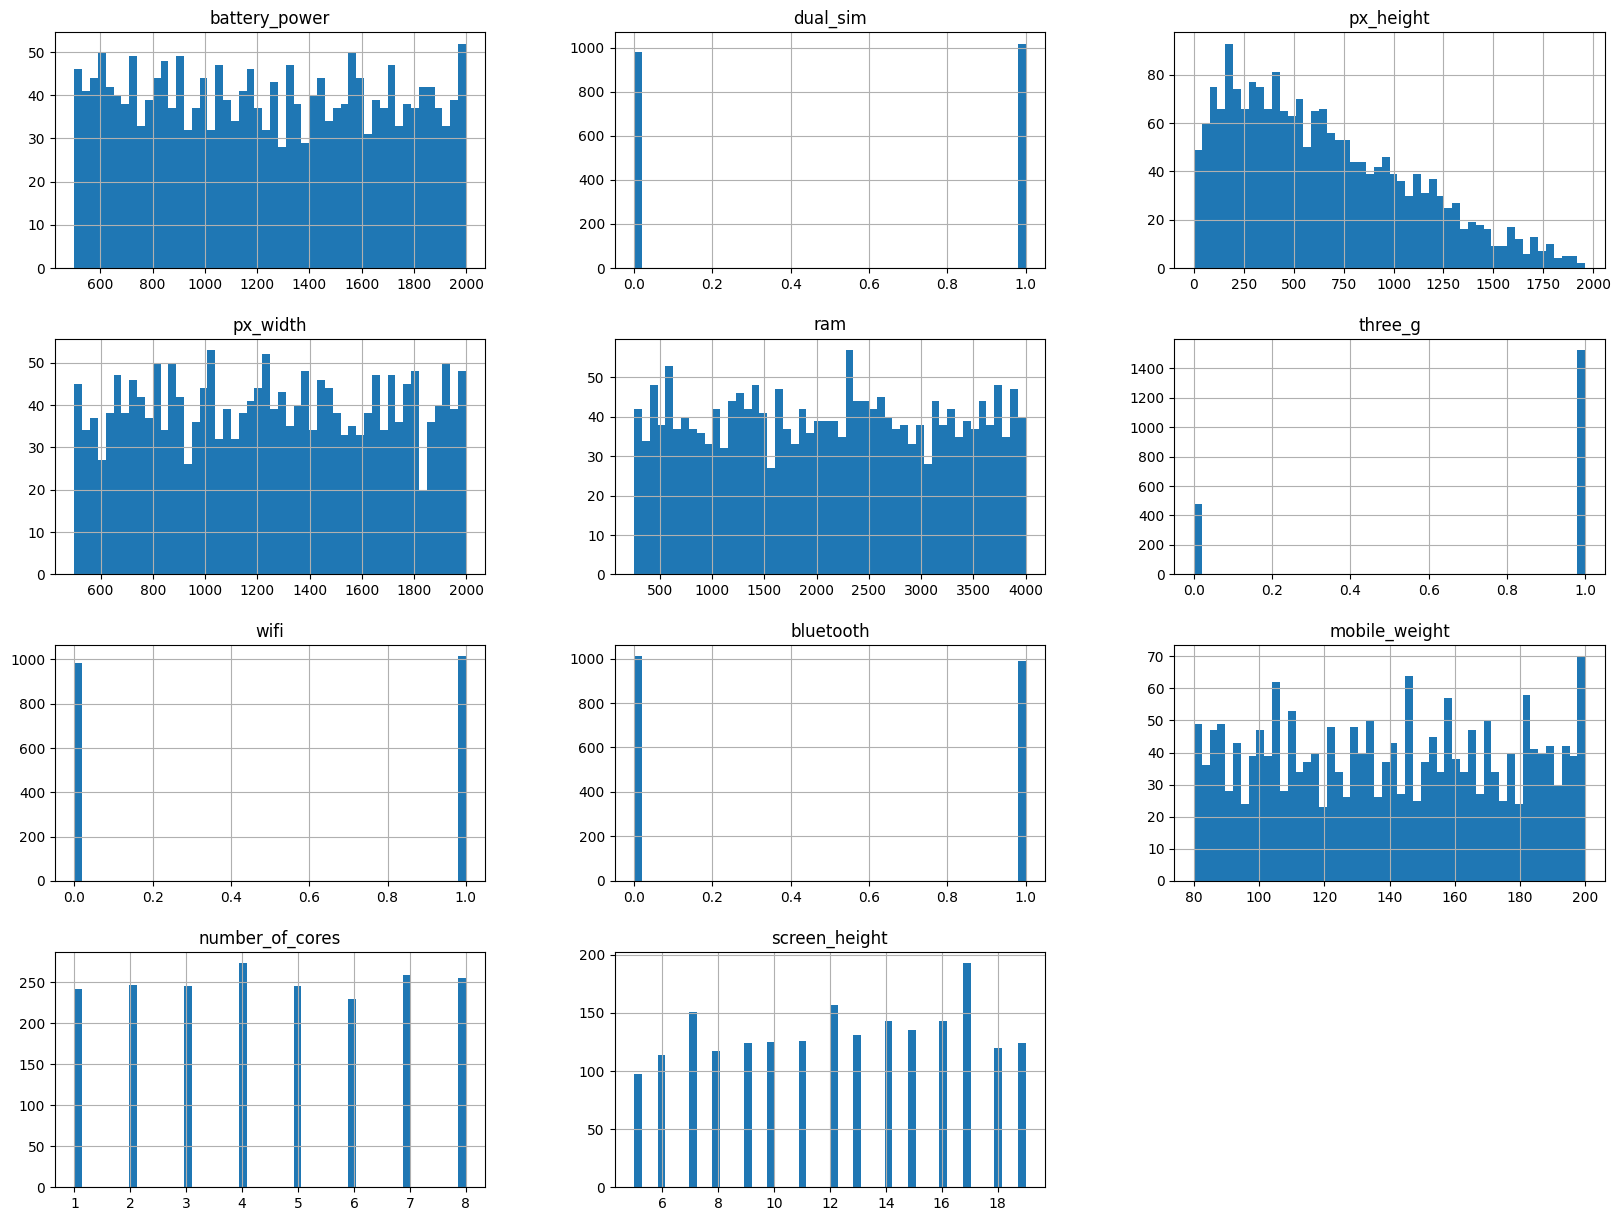

In [294]:
df.hist(bins=50, figsize=(20,15))
plt.show()

The correlation heatmap

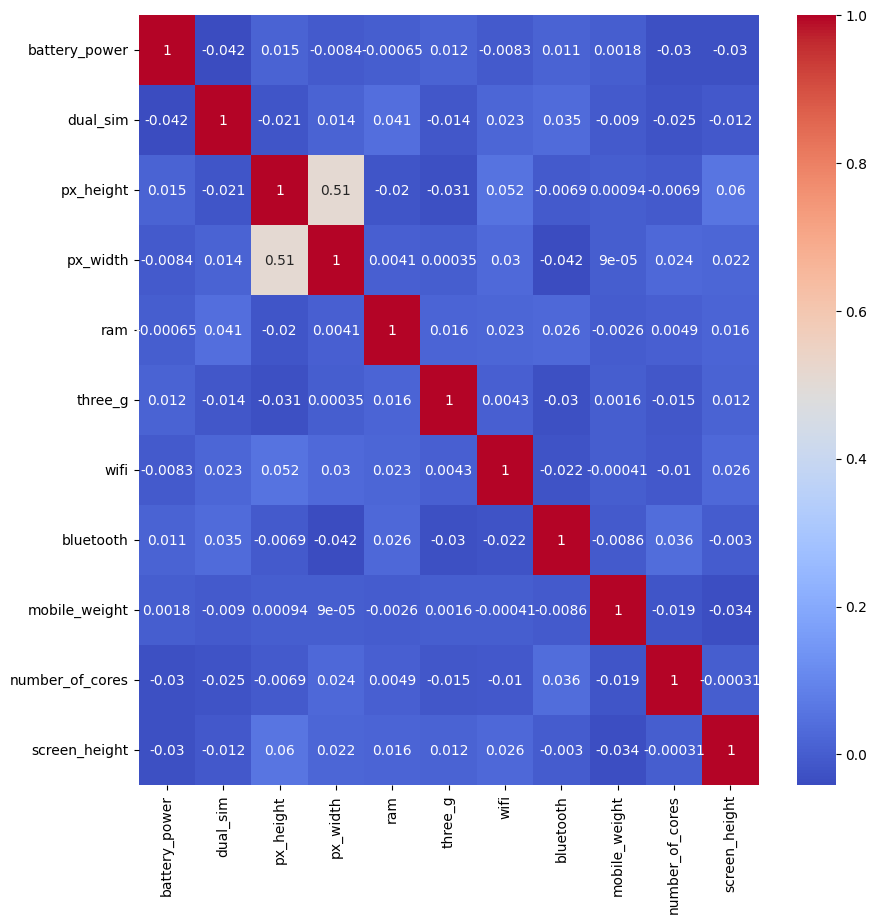

In [295]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Count how many samples belong to each price_range class.

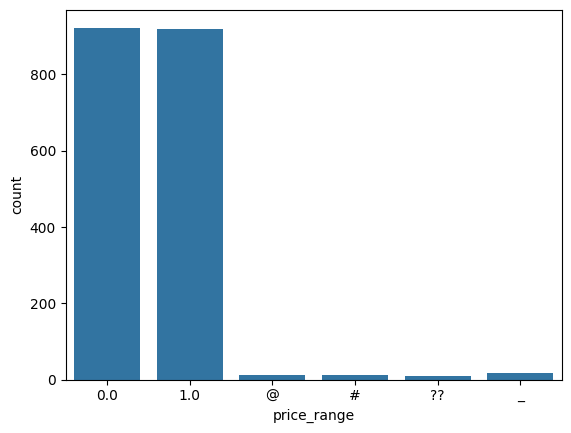

In [296]:
sns.countplot(x=df['price_range'])
plt.show()

/tmp/ipython-input-3787983166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_range'].replace(['@','#','??', '_'], None, inplace=True)


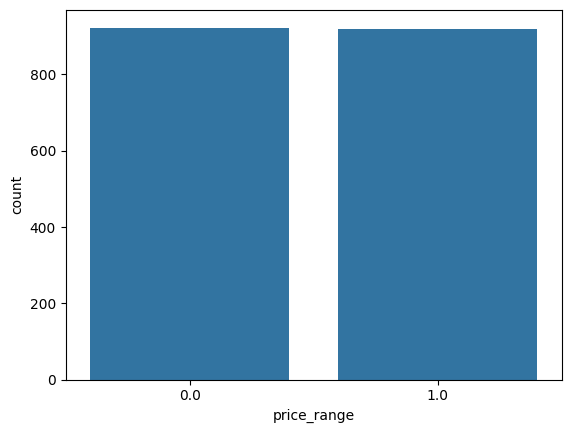

In [297]:
df['price_range'].replace(['@','#','??', '_'], None, inplace=True)
sns.countplot(x=df['price_range'])
plt.show()

Visualize relationships such as RAM vs price_range and battery_power vs price_range.

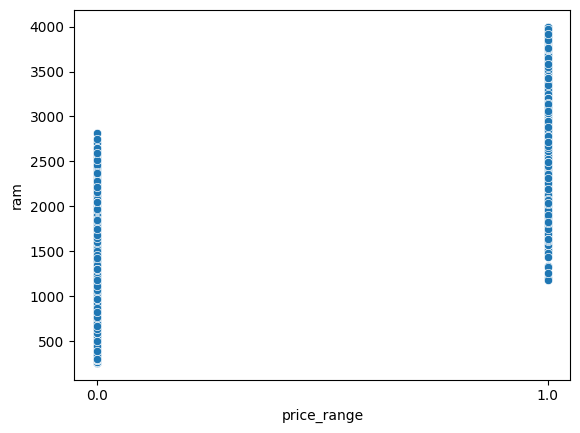

In [298]:
sns.scatterplot(x=df['price_range'], y=df['ram'])
plt.show()

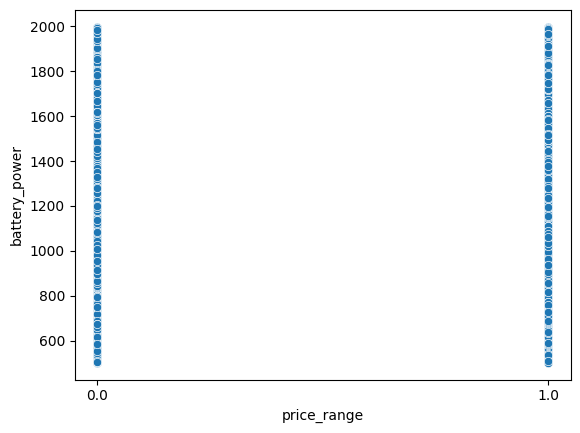

In [299]:
sns.scatterplot(x=df['price_range'], y=df['battery_power'])
plt.show()

# 3. Data Cleaning

Identify and handle invalid values such as "@", "??", "N/A", and "_".

Convert all numeric columns that became objects back to numeric.

In [300]:
invalid_cols = ['clock_speed','four_g', 'talk_time', 'touch_screen', 'price_range', 'front_camera', 'memory', 'mobile_depth', 'camera_pixels', 'screen_width']
for i in invalid_cols:
  df[i+'_cleaned'] = pd.to_numeric(df[i], errors='coerce')

Handle missing values by replacing NaN with the mean, median, or mode depending on the column type.

Confirm all features are numeric and suitable for model training.


In [301]:
cols_for_mode = ['four_g', 'touch_screen', 'price_range']
for i in cols_for_mode:
  df[i+'_cleaned'].fillna(df[i+'_cleaned'].mode()[0], inplace=True)

cols_for_mean = ['clock_speed', 'talk_time', 'front_camera', 'memory', 'mobile_depth', 'camera_pixels', 'screen_width']
for i in cols_for_mean:
  df[i+'_cleaned'].fillna(df[i+'_cleaned'].mean(),inplace=True)

df_cleaned = df.drop(invalid_cols, axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   battery_power          2000 non-null   int64  
 1   dual_sim               2000 non-null   int64  
 2   px_height              2000 non-null   int64  
 3   px_width               2000 non-null   int64  
 4   ram                    2000 non-null   int64  
 5   three_g                2000 non-null   int64  
 6   wifi                   2000 non-null   int64  
 7   bluetooth              2000 non-null   int64  
 8   mobile_weight          2000 non-null   int64  
 9   number_of_cores        2000 non-null   int64  
 10  screen_height          2000 non-null   int64  
 11  clock_speed_cleaned    2000 non-null   float64
 12  four_g_cleaned         2000 non-null   float64
 13  talk_time_cleaned      2000 non-null   float64
 14  touch_screen_cleaned   2000 non-null   float64
 15  pric

/tmp/ipython-input-2827787648.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i+'_cleaned'].fillna(df[i+'_cleaned'].mode()[0], inplace=True) # Added [0] to get the first mode in case of multiple modes
/tmp/ipython-input-2827787648.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

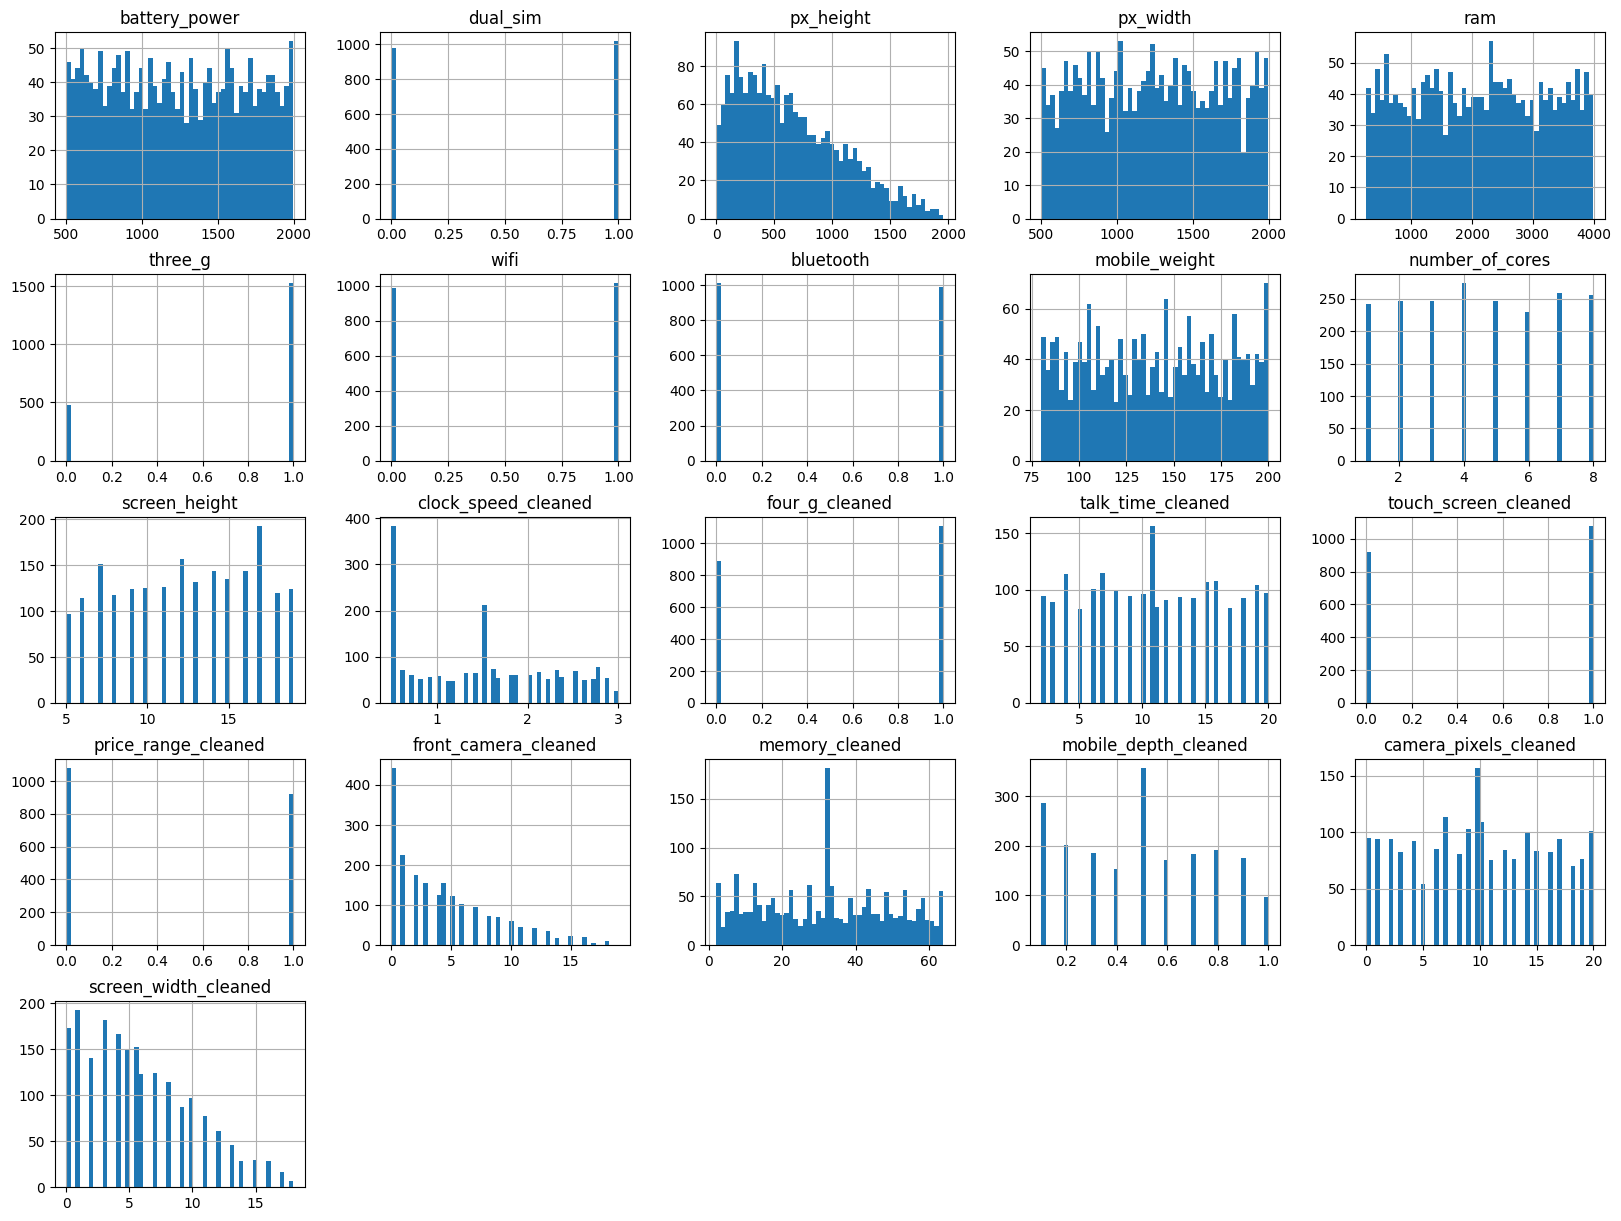

In [302]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# 4. Encoding

**Encode any categorical columns using an appropriate encoding method.**


**Ensure all features are numeric after encoding**


There are no categorical features
The all object types were numerical features with some invlaid values

# 5. Feature Selection 6. Train-Test Split


In [303]:
X = df_cleaned.drop('price_range_cleaned', axis=1)
y = df_cleaned['price_range_cleaned'].astype(int)

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training 8. Evaluation

Train and evaluate three models:


Logistic Regression


Random Forest


XGBoost


In [305]:
#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [306]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [307]:
# XGBoost
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

Predict on the test data for each model.


Calculate the following metrics: Accuracy, Precision, Recall, F1 Score, and ROC-AUC.


Plot the Confusion Matrix and ROC Curve for each model.


In [314]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.8525
Confusion Matrix:
 [[182  37]
 [ 22 159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       219
           1       0.81      0.88      0.84       181

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400

ROC-AUC score: 0.8547516334922678


In [313]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.905
Confusion Matrix:
 [[191  28]
 [ 10 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       219
           1       0.86      0.94      0.90       181

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400

ROC-AUC score: 0.9084487499684654


In [312]:
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_xgb))

XGBoost:
Accuracy: 0.92
Confusion Matrix:
 [[195  24]
 [  8 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       219
           1       0.88      0.96      0.92       181

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

ROC-AUC score: 0.9231060319382427


By watching metrics we can see that the XGboost works better than others.